In [1]:
%load_ext autoreload

In [2]:
# import Inicializacion
# # %matplotlib inline
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from numpy.ma.bench import timer
# from scipy.sparse.linalg import svds
# import category_encoders as ce
# from xgboost import XGBClassifier, XGBRegressor
# from sklearn import metrics
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import StratifiedKFold
# from datetime import datetime
from Inicializacion import *
from Prediction import *
# from Ensambles import *
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from ParamsGrid import *

In [3]:
# e = Ensambles()

Inicializando
Comenzando operaciones
     Fill metros
       Terreno
       Apartamento
       Metros cubiertos null
       Metros totales null
       Terreno comercial
   Features engineering
     Fecha
     Amennities
     Ubicacion
     Features basadas en la descripción
   Nulls
     Drop cols
   Encoding
   Encoding top 5 propiedades
     Casa
     Apartamento
     Casa_en_condominio
     Terreno
     Local_Comercial
   drop nans in selected columns
     Predict nulls
       fill with xgboost. Feature:  {'garages'}
       Time taken: 0 hours 4 minutes and 13.92 seconds.
         Los mejores parametros son: 
         {'verbosity': 0, 'reg_alpha': 0, 'random_state': 42, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1, 'colsample_bynode': 1, 'colsample_bylevel': 1}
         ------------------------
         Best score: 
         0.6797781774580336
         ------------------------
       fill with xgboost. Feature:  

C:\Users\Lucas\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Lucas\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


       Time taken: 0 hours 0 minutes and 42.46 seconds.
         Los mejores parametros son: 
         {'verbosity': 0, 'reg_alpha': 0, 'random_state': 42, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1, 'colsample_bynode': 1, 'colsample_bylevel': 1}
         ------------------------
         Best score: 
         -71.69537847317716
         ------------------------
     patio
     cantidad de ambientes(incluye baño)
nulls en divisor:
     tamaño promedio del ambiente


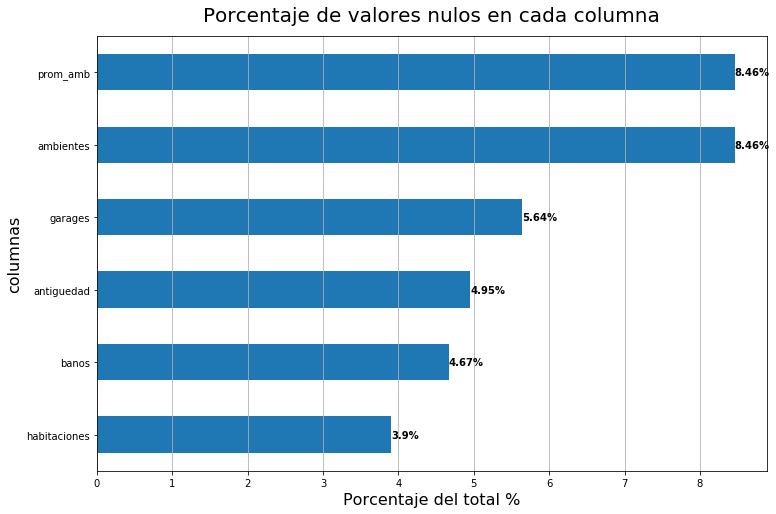

     densidad de construccion
   drop other nans
   Recast final
['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'patio', 'ambientes', 'ban_a_hab']
Columnas finales: 
Index(['id', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples',
       'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'precio',
       'anio', 'mes_sin', 'mes_cos', 'amenities', 'ubicacion',
       'zonas_exclusivas', 'refaccion', 'lujo', 'vigilancia', 'country',
       'tipodepropiedad_0bc', 'tipodepropiedad_1bc', 'tipodepropiedad_2bc',
       'tipodepropiedad_3bc', 'tipodepropiedad_4bc', 'tipodepropiedad_5bc',
       'ciudad_0bc', 'ciudad_1bc', 'ciudad_2bc', 'ciudad_3bc', 'ciudad_4bc',
       'ciudad_5bc', 'ciudad_6bc', 'ciudad_7bc', 'ciudad_8bc', 'ciudad_9bc',
       'ciudad_10bc', 'provincia_0bc', 'provincia_1bc', 'provincia_2bc',
       'provincia_3bc', 'provincia_4bc', 'provincia_5bc', 'provinc

<Figure size 432x288 with 0 Axes>

In [4]:
# out = Inicializacion.Inicializacion()
preprocesamiento = Inicializacion()
data = preprocesamiento.getDataframes()

In [5]:
p = ParamsGrid()
# print(ParamsGrid.param_random_forest)

In [6]:
param_random_forest = {
        'bootstrap': [True, False], #method for sampling data points (with or without replacement)
        #'criterion': 'mse',
        'max_depth': [None, 10, 20, 50, 75, 100], #max number of levels in each decision tree
        'max_features': ['auto', 'sqrt'],  # np.arange(10, 12, 15) #max number of features considered for splitting a node
        #'max_leaf_nodes': None,
        #'min_impurity_decrease': 0.0,
        #'min_impurity_split': None,
        'min_samples_leaf': np.arange(1, 2, 4), #min number of data points allowed in a leaf node
        'min_samples_split': np.arange(2, 5, 10), #min number of data points placed in a node before the node is split
        #'min_weight_fraction_leaf': 0.0,
        'n_estimators': np.arange(75, 100, 200, ),  # n_estimators = number of trees in the foreset
        #'n_jobs': 1,
        #'oob_score': False,
#         'random_state': 42,
#         'verbose': 0,
#         'warm_start': False
    }


In [7]:
print(data[0].shape)
print(data[1].shape)

(219698, 57)
(60000, 56)


In [10]:
p.metodos['RandomForest']

(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
 {'bootstrap': [True, False],
  'max_depth': array([None, 2, 5, 8, 11, 14, 17], dtype=object),
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': array([10, 15, 20, 25]),
  'min_samples_split': array([ 2,  5,  8, 11, 14, 17]),
  'n_estimators': array([1200, 1400, 1600])})

In [14]:
from regressor import *

In [15]:
r = Regressor()
# model = Prediction(data, p.metodos['RandomForest'][0], 'prediction', p.metodos['RandomForest'][1])
# model.gridSearchTrain()
# model.save()

Loading data...
El set de train tiene 219698 filas y 57 columnas
El set de test tiene 60000 filas y 56 columnas
Start training...
[0]	eval-mae:12.9214	train-mae:12.9147


KeyboardInterrupt: 

In [ ]:
type(model.gscv)

In [ ]:
answer = pd.DataFrame(list(zip(model.test_ids, model.predicted)), columns=['id', 'predicted'])
answer.to_csv('{}.csv'.format('result'), sep=',', index=False)


In [ ]:
# def nulls(df):
#     nulls = pd.DataFrame((df.isnull().sum().sort_values()/len(df)*100).round(2),columns=['porcentaje de NaN'])
#     if (nulls.sum() == 0).bool():
#         print("No hay nulls")
#     else:
#         nulls.drop(nulls.loc[nulls.loc[:,'porcentaje de NaN']<=0].index, inplace=True)
#         plt.figure(figsize=(12,8))
#         ax = nulls['porcentaje de NaN'].plot.barh()
#         ax.set_title('Porcentaje de valores nulos en cada columna',fontsize=20, y=1.02)
#         ax.set_xlabel('Porcentaje del total %', fontsize=16)
#         ax.set_ylabel('columnas', fontsize=16)
#         ax.grid(axis='x')

#         for y, x in enumerate(nulls['porcentaje de NaN']):
#             ax.text(x, y, s=str(x)+'%', color='black', fontweight='bold',va='center')

#         plt.show()

# df_test = pd.read_csv('data/test.csv')
# # nulls(df_test)
# nulls(dfs[0])
# nulls(dfs[1])

# dfs[1].info()
# out.df_xgb.garages_xgb.value_counts().sum()

In [ ]:
df_train = pd.read_csv('00-df_final.csv')


In [ ]:
df_train.columns

In [ ]:
# plt.hist(df_train['habitaciones'])